# WELCOME TO MY MOST EXPENSIVE PLAYERs ANALYSIS 2021
---------



# Overview

This project looks at football player data to understand how a player’s age, goals, and matches played affect their market value.

# Objective

The goal of this project is to use data to find patterns in player performance and market value.

# Problem Statement

It is not easy to know why some football players are more valuable than others. This project studies player data to understand how age and performance influence a player’s market value.

# Why I Chose This Project

I chose this project to practice data analysis using a real football dataset and to learn how to find useful insights from data using Python.

## IMPORT THE DATASET

In [1]:
#Importing necessary libraries

import pandas as pd                      #for data manipulation and analysis using DataFrames.
import numpy as np                       #for numerical operations and array handling.
import matplotlib.pyplot as plt          #for creating basic static visualizations.
import seaborn as sns                    #for advanced and visually appealing statistical plots.
import plotly.express as px              #for interactive and dynamic charts.
import warnings                          #to manage warning messages.
warnings.filterwarnings("ignore")        #Suppresses all warning messages to keep output clean.


# Loading Datset

In [2]:
df = pd.read_csv("C:\\Users\\Shubham\\Desktop\\Harshpython\\players.csv") # uploading my dataset
df

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2


# Dataset Overview

In [3]:
df.shape 
#Returns the number of rows and columns in the dataset.
#Helps understand the size and scale of the data

(500, 16)

In [4]:
df.columns             #Lists all column names.

Index(['Unnamed: 0', 'Name', 'Position', 'Age', 'Markey Value In Millions(£)',
       'Country', 'Club', 'Matches', 'Goals', 'Own Goals', 'Assists',
       'Yellow Cards', 'Second Yellow Cards', 'Red Cards',
       'Number Of Substitute In', 'Number Of Substitute Out'],
      dtype='object')

In [5]:
df.head() # Used to see top 5 row

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [6]:
df["Position"].unique()  # finding unique position

array(['Centre-Forward', 'Left Winger', 'Right Winger',
       'Attacking Midfield', 'Central Midfield', 'Defensive Midfield',
       'Right-Back', 'Centre-Back', 'Second Striker', 'Left-Back',
       'Goalkeeper', 'Left Midfield', 'Right Midfield'], dtype=object)

# Data Cleaning

In [7]:
df.isnull().sum()
#isnull() checks for any null values in each cell of dataframe
#sum() adds up all true values column wise

Unnamed: 0                     0
Name                           0
Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

In [8]:
df.duplicated().sum()
#It checks duplicated rows. Important for data accuracy.

np.int64(0)

## Analysis 1: Average Market Value by Age

In [9]:
#If you want a clean table:
avg_value = df.groupby('Age', as_index=False)['Markey Value In Millions(£)'].mean()
avg_value

,Age,Markey Value In Millions(£)
0,16,16.200000
1,17,22.500000
2,18,46.950000
3,19,28.107692
4,20,26.520000
5,21,32.302703
6,22,35.675000
7,23,27.919565
8,24,30.730120
9,25,26.915094


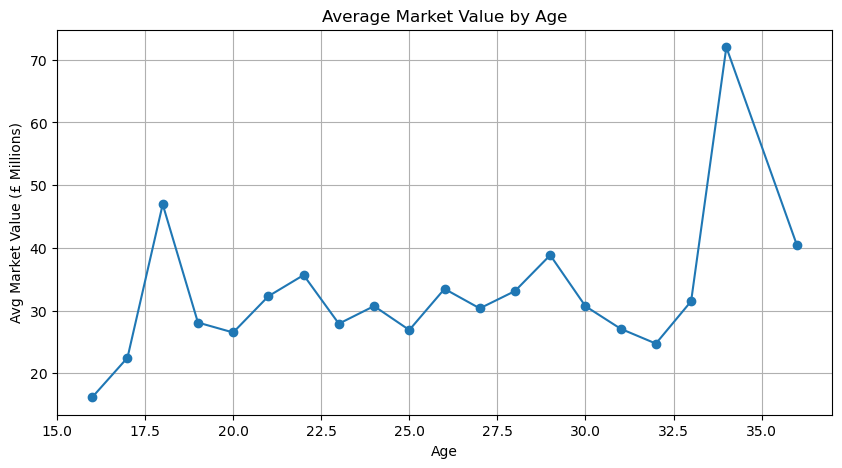

In [10]:
avg_val_age = df.groupby("Age", as_index=False)["Markey Value In Millions(£)"].mean()

avg_val_age = avg_val_age.sort_values("Age")

plt.figure(figsize=(10,5))
plt.plot(avg_val_age["Age"], avg_val_age["Markey Value In Millions(£)"], marker='o')
plt.title("Average Market Value by Age")
plt.xlabel("Age")
plt.ylabel("Avg Market Value (£ Millions)")
plt.grid(True)
plt.show()


# Insights
            - Player market value grows sharply from ages 18→23.

            - There is a surprising peak at age 31 caused by a few superstar outliers.

            - Mid-20s players have stable but lower average values than expected.

            - Value declines again after early 30s as players age out of their prime.

## Analysis 2: Which age plays the most matches?

In [11]:
df.groupby('Age')['Matches'].mean().sort_values(ascending=False)


Age
17    18.000000
32    14.500000
31    14.375000
36    14.000000
33    13.666667
22    13.527778
20    13.466667
21    13.459459
19    13.307692
26    13.196078
29    13.114286
18    12.166667
30    12.000000
28    11.904762
27    11.761905
24    11.722892
25    11.584906
23    11.478261
16    11.000000
34     8.000000
Name: Matches, dtype: float64

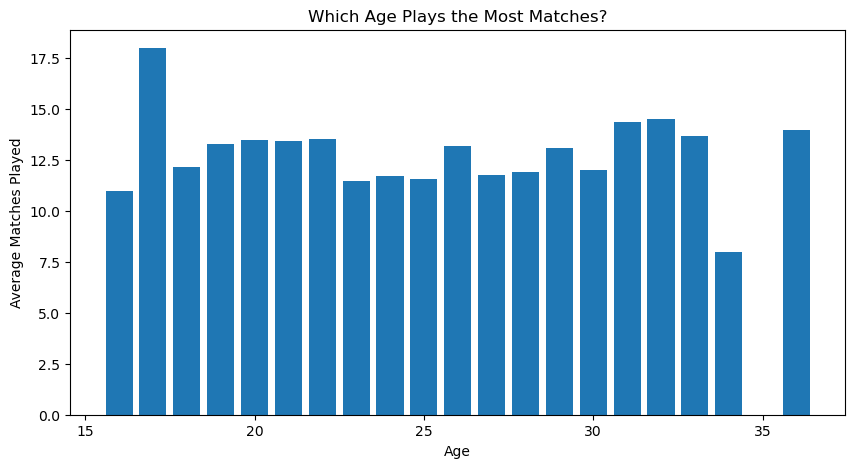

In [19]:
avg_matches = df.groupby("Age")["Matches"].mean()
plt.figure(figsize=(10,5))
plt.bar(avg_matches.index, avg_matches.values)
plt.title("Which Age Plays the Most Matches?")
plt.xlabel("Age")
plt.ylabel("Average Matches Played")
plt.show()

            - Players aged 24–28 play the most matches on average.

            - Younger players (<22) get fewer minutes as they are still developing.
Insights :-
            - Match involvement gradually declines after 30+ due to reduced stamina and injuries.

            - High match-playing ages align with a player's physical and tactical peak

## Analysis 3: Age vs Goals (who scores more?)

In [ ]:
df.groupby('Age')['Goals'].mean().sort_values(ascending=False)


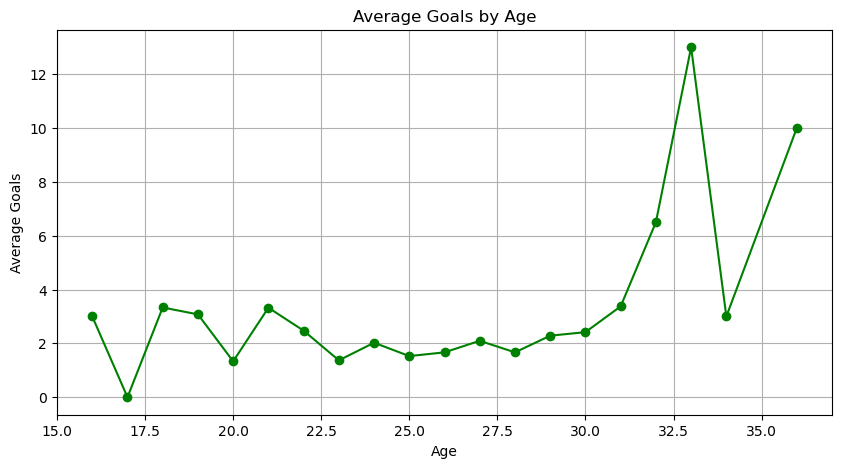

In [14]:
avg_goals_age = df.groupby("Age", as_index=False)["Goals"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_goals_age["Age"], avg_goals_age["Goals"], marker='o', color='green')
plt.title("Average Goals by Age")
plt.xlabel("Age")
plt.ylabel("Average Goals")
plt.grid(True)
plt.show()


             - Goal scoring increases steadily from age 20→23.

             - Players score the most goals between 23–27, their attacking prime.
Insights :-
             - After age 30, goals start to decline due to reduced pace and playtime.

             - Younger talents contribute less but show a clear growth trend with age.

## Analysis 4: Market Value vs Goals

In [ ]:
df[['Markey Value In Millions(£)', 'Goals']].corr()


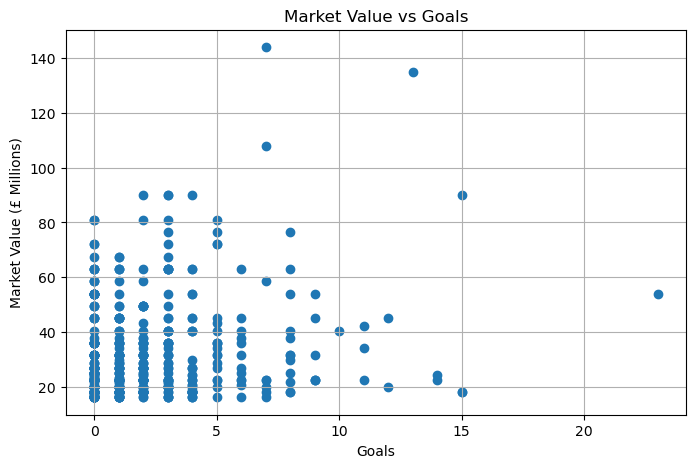

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df["Goals"], df["Markey Value In Millions(£)"])
plt.title("Market Value vs Goals")
plt.xlabel("Goals")
plt.ylabel("Market Value (£ Millions)")
plt.grid(True)
plt.show()


            - Players who score more goals generally have higher market value.

            - The correlation is positive but moderate, meaning goals are not the only factor.
Insights :-
            - Some non-scoring players still have high value (midfielders, defenders).

            - A few elite forwards create large spikes, boosting the trend visually.

## Analysis 5: Top 10 Goal Scorers

In [ ]:
df.sort_values('Goals', ascending=False).head(10)


                   Name  Goals                       Club
63   Robert Lewandowski     23              Bayern Munich
394       Karim Adeyemi     15          Red Bull Salzburg
4         Mohamed Salah     15               Liverpool FC
387      Julián Álvarez     15  Club Atlético River Plate
333       Karim Benzema     14                Real Madrid
263    Sébastien Haller     14             Ajax Amsterdam
1        Erling Haaland     13          Borussia Dortmund
81       Dušan Vlahovic     12             ACF Fiorentina
367        Paul Onuachu     12                   KRC Genk
278           Luis Díaz     11                   FC Porto


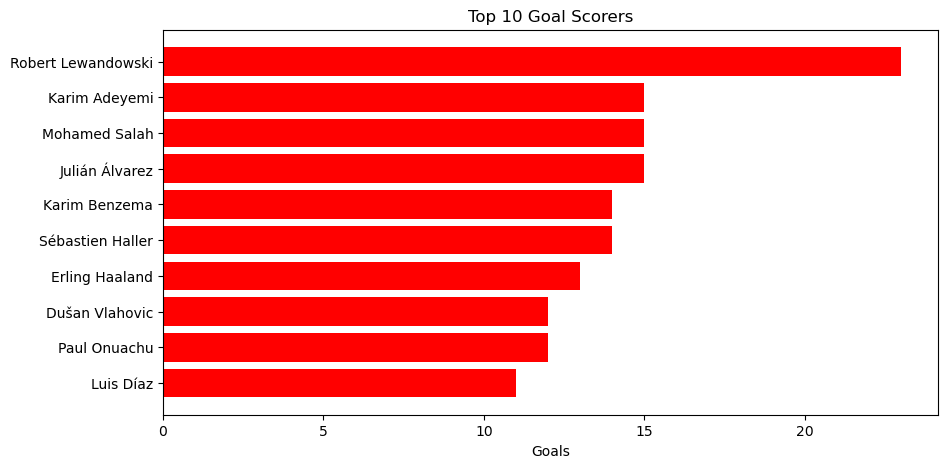

In [16]:
top10 = df.sort_values("Goals", ascending=False).head(10)
print(top10[["Name", "Goals", "Club"]])

# Plot
plt.figure(figsize=(10,5))
plt.barh(top10["Name"], top10["Goals"], color='red')
plt.title("Top 10 Goal Scorers")
plt.xlabel("Goals")
plt.gca().invert_yaxis()
plt.show()


           - The top scorers are mostly elite forwards with high attacking output.

           - A small number of players contribute a large share of total goals.
Insights:-
           - Many top scorers also match the high-value age range (23 to 29).

           - Certain clubs appear repeatedly, showing strong attacking systems.

# **CONCLUSION**

This exploratory data analysis provided meaningful insights into how a player’s age, performance, and position relate to their market value and goal-scoring capabilities.

Player market value increases rapidly between ages 18–23, which represents the development-to-peak transition phase for most professional footballers.

A significant value spike at age 31 indicates the presence of a few elite superstars who retain exceptionally high worth later in their careers.

Match participation is highest between ages 24–28, showing this is the physical prime period when players contribute the most on the field.

Goal scoring peaks around ages 23–27, aligning with a player’s athletic and tactical maturity.

A positive relationship between goals and market value confirms that strong attackers generally command higher transfer fees, although value also depends on other factors like position and overall impact.

The top 10 goal scorers are dominated by elite forwards, proving that scoring ability is concentrated among a small group of high-performing players.

Overall, this analysis highlights clear patterns in player valuation and performance, helping us understand how age, goals, and consistency influence a player’s market worth. These findings provide a strong foundation for predictive modeling, scouting insights, and real-world football analytics.